<a href="https://colab.research.google.com/github/duckbillLvr/software-lecture/blob/main/lecture6_1HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finterstellar

     |████████████████████████████████| 109 kB 15.9 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import finterstellar as fs

### 0. 우량주

- 가치주가 적정주가보다 싼 주식을 부르는 용어임에 반해, **우량주는 현재 주가가 어떤지는 따지지 않는다.**  
- 기업 자체의 수익성이 좋은지, 안전한지 등을 따진다.  
- 자본금 대비 얼마만큼을 벌어오느냐를 측정하는 지표인 ROA와 ROE로 측정한다
---
### 1. ROA(자산대비이익), ROE(자본대비이익)
- ROA는 회사가 가진 총자산을 이용해 얼마나 벌어왔는지 그 수익률을 파악할 수 있게 하는 지표이다.  
- ROA가 0.1이라면 자산이 10억인 회사가 이익을 1억, 즉 10%수익을 만들었다는 뜻이다.
- ROE는 ROA와 같은 개념이나 자산 대신 자본(순자산)으로 산출한다.
- 투자자에게는 ROA보다 ROE가 인기가 높다.

자산대비이익(ROA) 산식
> ROA = $\frac{당기순이익(NET Income)}{평균총자산(Total Assets, Average)}$ = $\frac{당기순이익}{\frac{기초총자산+기말총자산}{2}}$

자본대비이익(ROE) 산식
> ROE = $\frac{당기순이익(NET Income)}{평균총자본(Total Shareholders Equity, Averaged)}$ = $\frac{당기순이익}{\frac{기초총자본+기말총자본}{2}}$
---
####  ROA, ROE의 차이는 기업이 레버리지(부채)를 얼마나 활용하는지를 보여준다.
> ROE=$\frac{이익}{자본}$=$\frac{이익}{자산}$x$\frac{자산}{자본}$=$\frac{이익}{자산}$x$\frac{자본+부채}{자본}$=ROA x 레버리지

- 마지막의 $\frac{자산}{자본}$ 부분은 자기자본 대비 얼마나 자금을 당겼는지를 나타내는 레버리지 비율로 볼 수 있다.
- ROA가 그대로인데 ROE가 올라가는 기업이라면 부채를 잘 활용하는 기업이라고 판단할 수 있다.
- 투자에 있어서 적절한 레버리지는 수익률을 높이는 영양제이다.
- ROA와 ROE가 함께 올라가는 것이 베스트 케이스 이다.

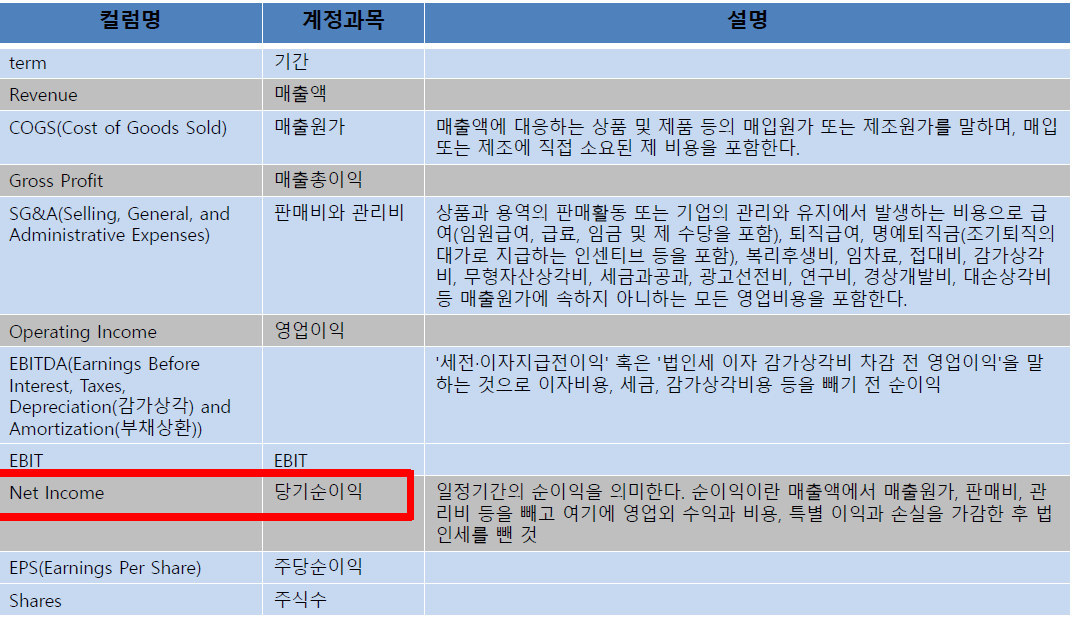

In [7]:
# 1. ROA
df = fs.fn_single(otp='16487125231099712210', symbol='BABA', window='T') # 알리바바의 재무데이터

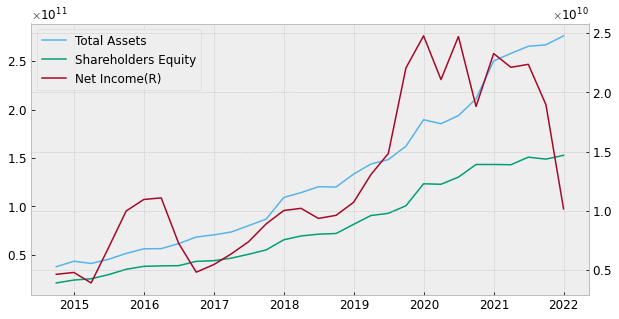

In [8]:
fs.draw_chart(df, left=['Total Assets', 'Shareholders Equity'], right='Net Income')

In [9]:
'''
ROA 계산
ROA 계산을 위해서는 총자산의 기초-기말 평균값을 구해야 한다.
'''
df['Total Assets'].tail()

2020-12-31    2.501797e+11
2021-03-31    2.580066e+11
2021-06-30    2.653184e+11
2021-09-30    2.668670e+11
2021-12-31    2.761150e+11
Name: Total Assets, dtype: float64

In [10]:
df['Total Assets'].shift(4).tail() # 1년 shift

2020-12-31    1.895340e+11
2021-03-31    1.854290e+11
2021-06-30    1.937940e+11
2021-09-30    2.111500e+11
2021-12-31    2.501797e+11
Name: Total Assets, dtype: float64

In [11]:
df['Shifted Total Assets'] = df['Total Assets'].shift(4)
df['Avg Assets'] = (df['Total Assets'] + df['Shifted Total Assets']) / 2
df[['Total Assets', 'Shifted Total Assets', 'Avg Assets']]

,Total Assets,Shifted Total Assets,Avg Assets
2014-09-30,3.785300e+10,NaN,NaN
2014-12-31,4.351500e+10,NaN,NaN
2015-03-31,4.120600e+10,NaN,NaN
2015-06-30,4.549400e+10,NaN,NaN
2015-09-30,5.157000e+10,3.785300e+10,4.471150e+10
2015-12-31,5.629600e+10,4.351500e+10,4.990550e+10
2016-03-31,5.652100e+10,4.120600e+10,4.886350e+10
2016-06-30,6.168800e+10,4.549400e+10,5.359100e+10
2016-09-30,6.844100e+10,5.157000e+10,6.000550e+10
2016-12-31,7.069900e+10,5.629600e+10,6.349750e+10


In [12]:
df['ROA'] = df['Net Income'] / df['Avg Assets']
df[['ROA', 'Net Income', 'Avg Assets']].tail()

,ROA,Net Income,Avg Assets
2020-12-31,0.105897,2.328213e+10,2.198569e+11
2021-03-31,0.099752,2.211686e+10,2.217178e+11
2021-06-30,0.097436,2.236709e+10,2.295562e+11
2021-09-30,0.079321,1.895845e+10,2.390085e+11
2021-12-31,0.038615,1.016148e+10,2.631474e+11


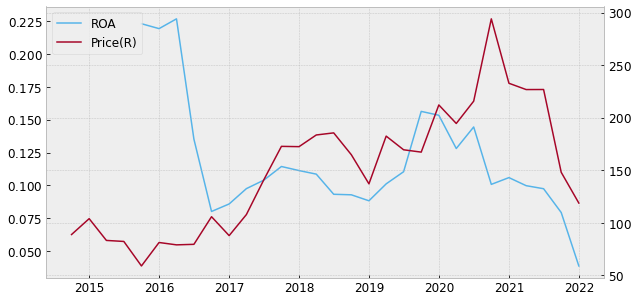

In [13]:
fs.draw_chart(df, left='ROA', right='Price')

In [15]:
'''
ROE 계산
ROE = 당기순이익 / 평균총자본
'''
df['Avg Equity'] = (df['Shareholders Equity'] + df['Shareholders Equity'].shift(4)) / 2
df['ROE'] = df['Net Income'] / df['Avg Equity']
df[['ROE', 'Net Income', 'Avg Equity']].tail()

,ROE,Net Income,Avg Equity
2020-12-31,0.174530,2.328213e+10,1.333986e+11
2021-03-31,0.166261,2.211686e+10,1.330251e+11
2021-06-30,0.159077,2.236709e+10,1.406051e+11
2021-09-30,0.129748,1.895845e+10,1.461171e+11
2021-12-31,0.068619,1.016148e+10,1.480849e+11


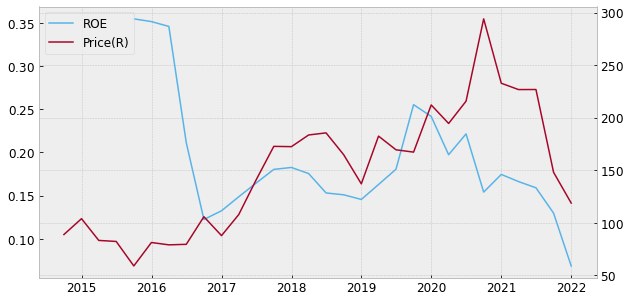

In [16]:
fs.draw_chart(df, left='ROE', right='Price')

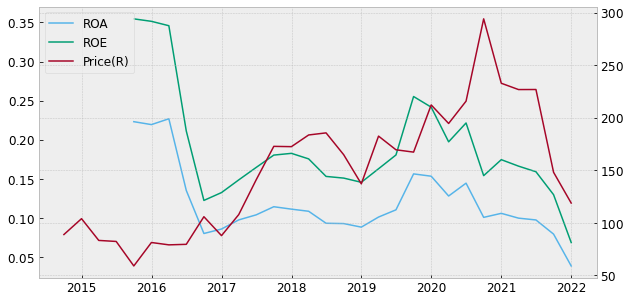

In [17]:
# ROA, ROE 주가를 차트로 작성
fs.draw_chart(df, left=['ROA', 'ROE'], right='Price')

### 자산대비이익(ROA), 자본대비이익(ROE) 백테스트
- ROA, ROE는 투자 효율을 의미하니 높을수록 좋다.

In [18]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487125231099712210', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [19]:
# ROA 계산
s, signal = {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Net Income'] <0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] <0), 'ROA'] = float('nan')
  s[t] = fs.fn_filter(data[t], by='ROA', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 5.23%
Accumulated return: 66.51%
Investment period: 10.0yrs
Sharpe ratio: 0.32
MDD: -33.96%


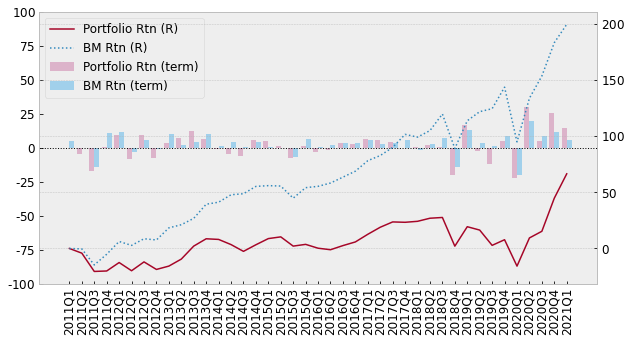

In [20]:
fs.draw_return(df)

In [21]:
# ROE 계산
s, signal = {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
  data[t].loc[(data[t]['Net Income'] <0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] <0), 'ROE'] = float('nan')
  s[t] = fs.fn_filter(data[t], by='ROE', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 7.82%
Accumulated return: 112.54%
Investment period: 10.0yrs
Sharpe ratio: 0.61
MDD: -25.78%


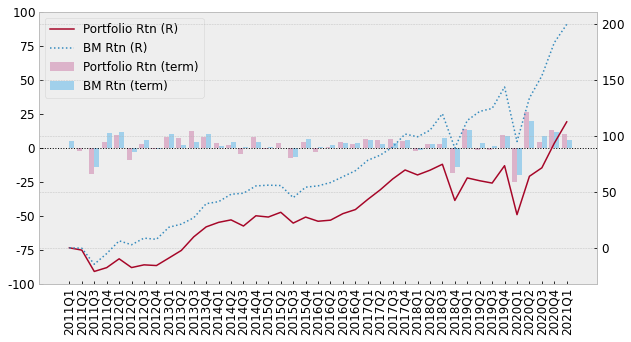

In [22]:
fs.draw_return(df)

### 2. 회계사가 유행시킨 장기투자 전략, RIM(잔여이익모델)
- 은행 예금보다는 수익률을 바라는 투자
- 기업이 창출한 초과이익(잔여이익)을 내 목표수익률과 비교해서 기업의 주가를 산정하는 방식이다.  <br><br>
초과이익(목표 수익률 이상의 수익분) = 이익 - 자본조달비용  
$$기업가치 = 자본 + 초과 이익, 　기업 = 자본 + \frac{초과이익}{목표수익률}$$<br><br>
- RIM 산식
> 주당순자산(BPS)은 PBR을 구할 때와 같이 재무제표의 자본을 주식수로 나누어 계산하고, 자본이익률 ROE는 당기순이익을 자본으로 나눈 값이다.  
RIM은 ROE에 매우 의존적이라 ROE를 어떤 값을 사용하느냐가 큰 영향을 끼친다.  
산출된 적정주가가 실제 주가보다 높다면 현재 주가가 저평가 상태라고 판단할 수 있다.<br><br>
$$기업가치 = 자본 + \frac{이익 - 자본조달비용}{목표수익률} = 자본+\frac{(자본\times자본이익률)-(자본\times목표수익률)}{목표수익률}$$  
$$적정주가 = 주당순자산(BPS) + \frac{자본이익률}{목표수익률}$$


In [25]:
df = fs.fn_single(otp='16487125231099712210', symbol = 'JPM', window='T') # JP모건의 재무 데이터

In [26]:
df['BPS'] = df['Shareholders Equity'] / df['Shares']
df['ROE'] = df['Net Income'] / df['Shareholders Equity']
df['ROE3AVG'] = df['ROE'].rolling(12).mean() # 안정적인 ROE 값을 위해 3년간 이동평균 ROE
df['RIM'] = df['BPS'] * df['ROE3AVG'] / .1 # .1은 목표수익률

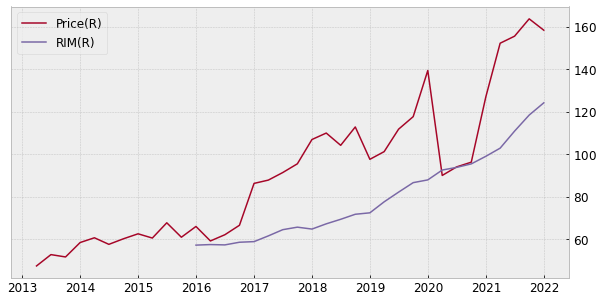

In [27]:
fs.draw_chart(df, right=['Price', 'RIM'])

- 전통적인 배당주인 은행주가 정부의 압력으로 배당을 확대하지 못하는 상황임에도 불구하고 시장은 JP모건의 목표 수익률을 10% 이상으로 바라보고 있는 것이다.

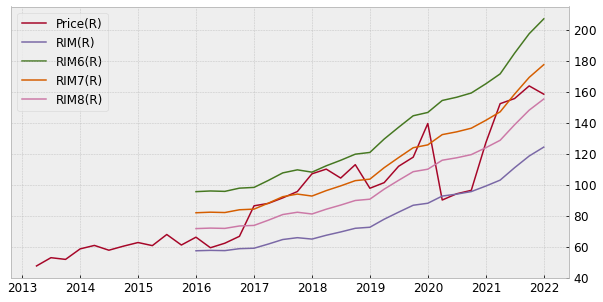

In [28]:
# 밴드 그리기
df['RIM6'] = df['BPS'] * df['ROE3AVG'] / .06
df['RIM7'] = df['BPS'] * df['ROE3AVG'] / .07
df['RIM8'] = df['BPS'] * df['ROE3AVG'] / .08
fs.draw_chart(df, right=['Price', 'RIM', 'RIM6', 'RIM7', 'RIM8'])
# 목표 수익률을 각각 6%, 7%, 8%로 잡아 RIM 적정주가를 산출해 주가와 비교

#### 회계사가 유행시킨 장기투자 전략, RIM(잔여이익모델)
**잔여이익모델(RIM) 백테스팅**
- RIM을 이용한 투자 전략으로 산출한 적정주가보다 실제주가보다 실제 주가가 낮으면(주가 < 적정주가) 주가가 저평가된 상태로 판단하여 매수하고 그렇지 않으면 매도하는 전략
- 투자기간 : 2011년 1분기 ~ 2021년 1분기 완료

In [29]:
for t in terms:
  t_1 = fs.quarters_before(terms, t, 4) # 1년전 값
  t_2 = fs.quarters_before(terms, t, 8) # 2년전 값
  data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[t_1]['Shareholders Equity']) / 2
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
  data[t].loc[(data[t]['Net Income'] <0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'ROE'] = float('nan')
  data[t]['Avg ROE'] = (data[t]['ROE'] + data[t_1]['ROE'] + data[t_2]['ROE']) / 3
  data[t]['RIM'] = data[t]['BPS'] * data[t]['Avg ROE'] / .1
  data[t]['P/RIM'] = data[t]['Price_M3'] / data[t]['RIM'] # 적정주가와 실제 주가를 비교하기 위해 프라이스멀티플을 구할 때 했던 것처럼 주가를 정정주가로 나누어 P/RIM 칼럼을 생성

- RIM을 이용한 투자 전략을 테스트
> **P/RIM > 1 이면 주가가 적정주가보다 높으니 고평가, P/RIM < 1 이면 저평가 상태라고 볼 수 있다.**  
주가는 분기 말 기준 3개월 후 주가인 Price_M3를 사용한다.(리밸런싱도 3개월 후 계획)  
저평가된 종목을 찾기 위해 fn_filter() 함수를 사용해 P/RIM이 낮은 30개 종목을 선정

In [ ]:
s, signal = {}, {}
for t in terms:
  s[t] = fs.fn_filter(data[t], by='P/RIM', floor=0, cap=1, n=30, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 6.97%
Accumulated return: 96.32%
Investment period: 10.0yrs
Sharpe ratio: 0.35
MDD: -46.61%


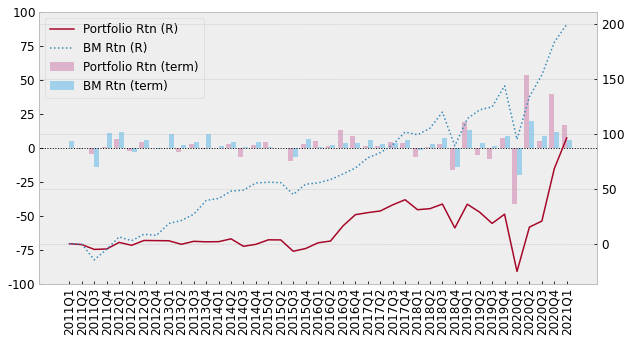

In [ ]:
fs.draw_return(df)

### 3. 영업 효율이 좋은 기업, GP/A

> $$GP/A = \frac{매출총이익(Gross Profit)}{총자산}$$

- 싸지만 수익성이 떨어지는 종목을 매수하거나 비싸지만 수익성이 높은 종목을 매도하는 것을 방지할 수 있다.

In [ ]:
df = fs.fn_single(otp='16487125231099712210', symbol='LMT', window='T')

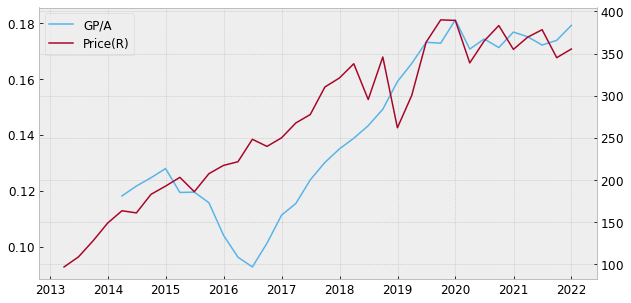

In [ ]:
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2
df['GP/A'] = df['Gross Profit'] / df['Avg Assets']
fs.draw_chart(df, left='GP/A', right='Price')

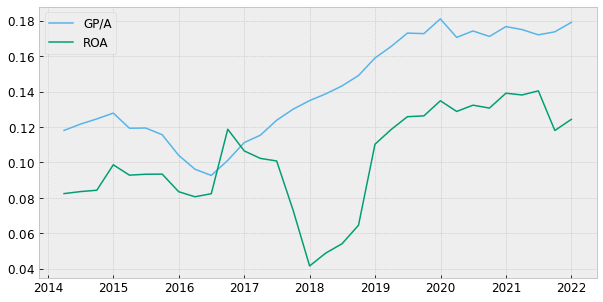

In [ ]:
# GP/A 와 ROA 비교
df['ROA'] = df['Net Income'] / df['Avg Assets']
fs.draw_chart(df, left=['GP/A', 'ROA'])

- GP/A 백테스트

In [ ]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487125231099712210', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
s, signal = {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')
  s[t] = fs.fn_filter(data[t], by='GP/A', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal = signal, data=data, m=3, cost=.001)

CAGR: 14.13%
Accumulated return: 275.53%
Investment period: 10.0yrs
Sharpe ratio: 1.03
MDD: -38.17%


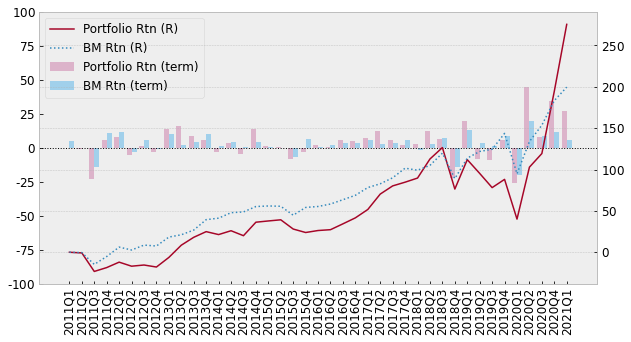

In [ ]:
fs.draw_return(df)

- PER 전략 테스트

In [ ]:
s = {}
signal = {}
for t in terms:
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
  s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap = 10, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 6.31%
Accumulated return: 84.45%
Investment period: 10.0yrs
Sharpe ratio: 0.65
MDD: -14.98%


- PER, GP/A 합성전략 테스트

In [ ]:
s, s1, s2, signal = {}, {}, {}, {}
for t in terms:
  #GP/A
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')
  #PER
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1,cap=10, asc=True)
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 6.21%
Accumulated return: 82.75%
Investment period: 10.0yrs
Sharpe ratio: 0.28
MDD: -54.95%


In [ ]:
# PBR 단독 성과
s = {}
signal = {}
for t in terms:
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap = 1,n=30, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 31.04%
Accumulated return: 1395.90%
Investment period: 10.0yrs
Sharpe ratio: 2.86
MDD: -38.99%


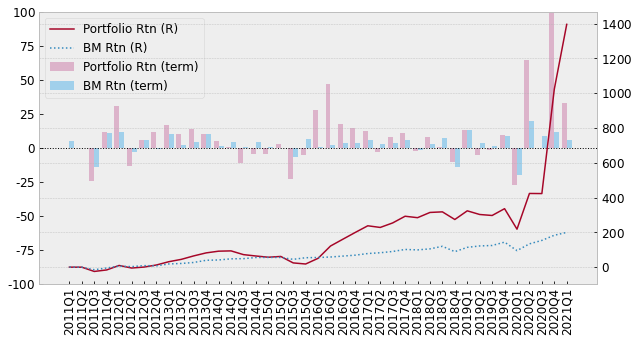

In [ ]:
fs.draw_return(df)

In [ ]:
# PBR, GP/A 합성 백테스트
s, s1, s2, signal = {}, {}, {}, {}
for t in terms:
  #GP/A
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')
  #PBR
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  s1[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1,cap=1, asc=True)
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 23.41%
Accumulated return: 720.54%
Investment period: 10.0yrs
Sharpe ratio: 1.67
MDD: -48.28%


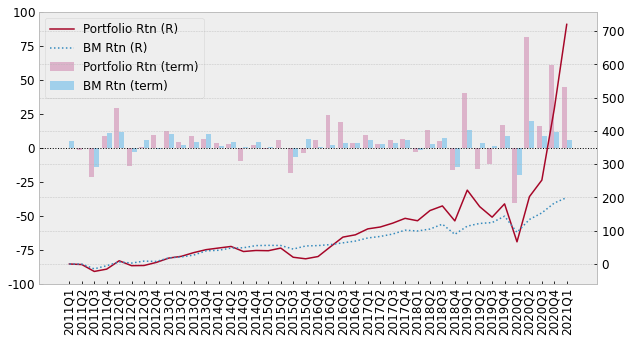

In [ ]:
fs.draw_return(df)

### 4. 안정성 지표
- 전체 자산 중 부채가 얼마나 많은지를 따지는 부채비율, 부채 중에서도 차입금비율을 봐야 한다.
- 부채가 많으면 기업은 채권자의 손에 넘어간다.


부채비율이 100이상이라면 부채가 자본보다 많은 것이다.
> $$부채비율 = \frac{총부채(Total\,Liabilities)}{총자본(Shareholders\,Equity)} \times 100$$  


- 부채 비율이 높다고 해서 반드시 나쁜 것은 아니다.
- 차임금은 이자 비용을 발생시켜 기업의 손익에 직접적인 영향을 미친다.


> $$ 차입금비율 = \frac{단기차입임(Current\,Debt) + 장기차입금(Long\,Term,Debt)}{총자본(Shareholders\,Equity)} \times 100$$


In [ ]:
# 부채비율과 차입금비율 계산
df = fs.fn_single(otp='16487125231099712210', symbol='UBER', window='T') # 우버의 재무 데이터

In [ ]:
df['Liability/Equity'] = df['Total Liabilities'] / df['Shareholders Equity']
df['Debt/Equity'] = (df['Long Term Debt'] + df['Current Debt']) / df['Shareholders Equity']
df[['Liability/Equity', 'Debt/Equity']].tail()

,Liability/Equity,Debt/Equity
2020-12-31,1.59,0.85
2021-03-31,1.51,0.72
2021-06-30,1.45,0.69
2021-09-30,1.62,0.80
2021-12-31,1.62,0.80


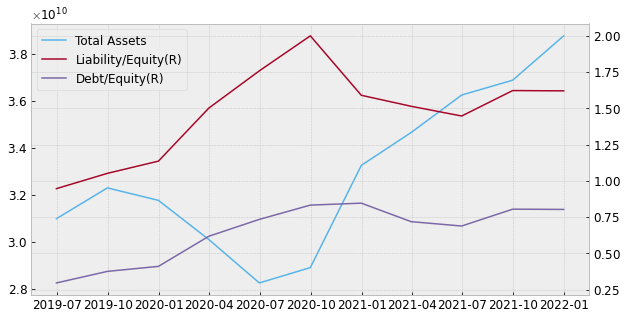

In [ ]:
fs.draw_chart(df, left='Total Assets', right=['Liability/Equity', 'Debt/Equity'])

- 부채비율평가: 부채비율은 늘어나고 자산은 줄어드는 형태로 가장 경계해야할 모양의 그래프
- 차입금비율평가 : 역시 2020년 7월 자산이 감소하는면서 부채 비율은 올라가는 형태이다.

In [ ]:
# Liability/Equity 백테스팅
s = {}
signal = {}
for t in terms:
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  s[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=30, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 4.93%
Accumulated return: 61.90%
Investment period: 10.0yrs
Sharpe ratio: 0.26
MDD: -32.60%


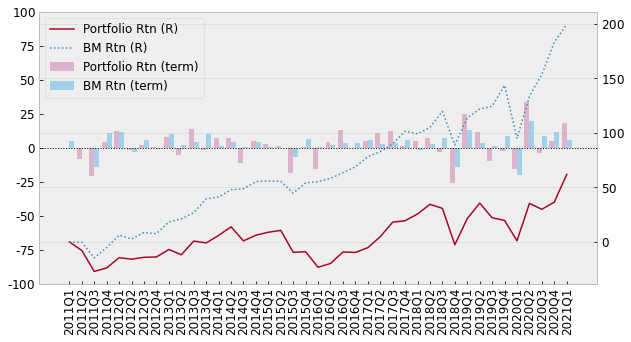

In [ ]:
fs.draw_return(df)

In [ ]:
# PER + Liability/Equity 백테스팅
s1, s2, s, signal = {}, {}, {}, {}
for t in terms:
  # PER
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
  # Liability/Equity
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  s1[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, asc=True)
  s2[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=1000, asc=True)
  s[t] = fs.combine_signal(s1[t], s2[t], how='and', n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 0.82%
Accumulated return: 8.52%
Investment period: 10.0yrs
Sharpe ratio: 0.03
MDD: -59.25%


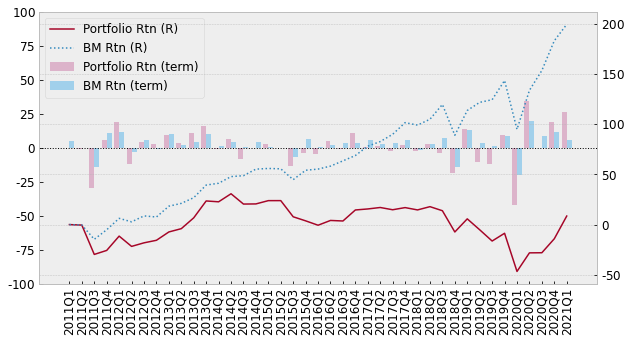

In [ ]:
fs.draw_return(df)

In [ ]:
# PBR + Liability/Equity 백테스팅
s1, s2, s, signal = {}, {}, {}, {}
for t in terms:
  # PBR
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  # Liability/Equity
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  s1[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
  s2[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=1000, asc=True)
  s[t] = fs.combine_signal(s1[t], s2[t], how='and', n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 20.03%
Accumulated return: 521.62%
Investment period: 10.0yrs
Sharpe ratio: 1.18
MDD: -46.77%


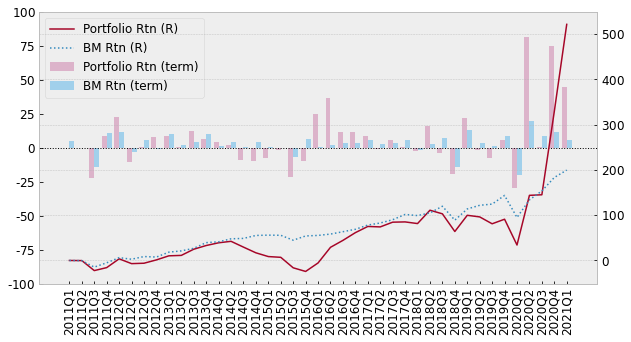

In [ ]:
fs.draw_return(df)

### 5. 쑥쑥 자라는 기업, 성장률 지표

 $$성장률 기본 공식 = \frac{현재값-기준값}{기준값}$$  
 $$매출액 증가율(Revenue\,Growth) = \frac{현재\,매출액-매출액\,기준값}{매출액\,기준값}$$  
 $$당기순이익 증가율(Net\,Income\,Growth) = \frac{현재\,당기순이익-당기순이익\,기준값}{당기순이익\,기준값}$$  
 $$자산 증가율(Asset Growth) = \frac{현재자산-자산\,기준값}{자산\,기준값}$$

In [ ]:
# 넷플릭스 재무데이터 불러오기
df = fs.fn_single(otp='16487125231099712210', symbol='NFLX', window='T')

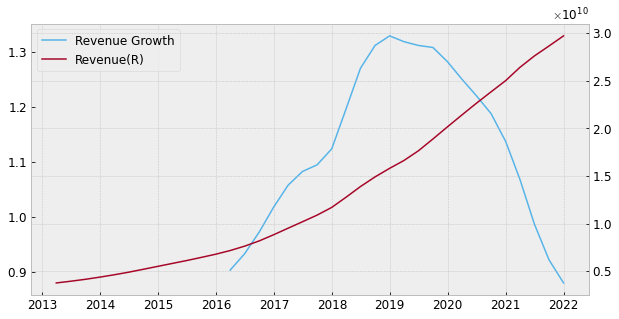

In [ ]:
# 매출액 증가율 (3년간)
df['Revenue Growth'] = (df['Revenue'] - df['Revenue'].shift(12)) / abs(df['Revenue'].shift(12))
fs.draw_chart(df, left='Revenue Growth', right='Revenue')

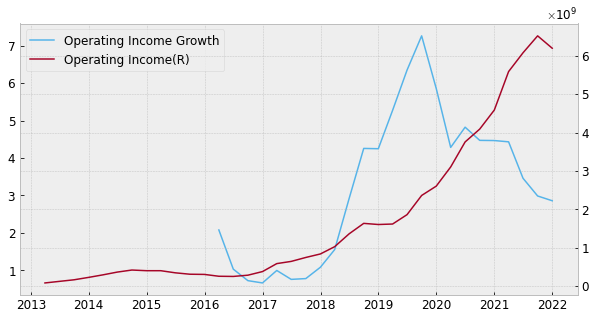

In [ ]:
# 영업이익 증가율 (3년간)
df['Operating Income Growth'] = (df['Operating Income'] - df['Operating Income'].shift(12)) / abs(df['Operating Income'].shift(12))
fs.draw_chart(df, left='Operating Income Growth', right='Operating Income')

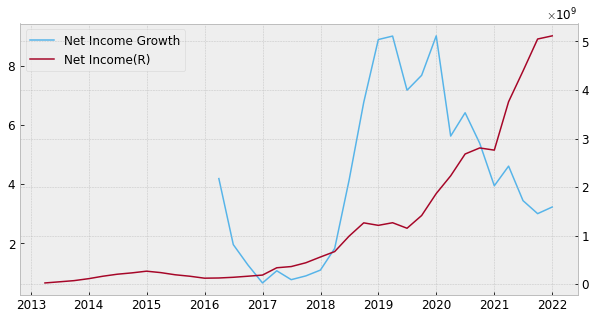

In [ ]:
# 순이익 증가율(3년간)
df['Net Income Growth'] = (df['Net Income'] - df['Net Income'].shift(12)) / abs(df['Net Income'].shift(12))
fs.draw_chart(df, left='Net Income Growth', right='Net Income')

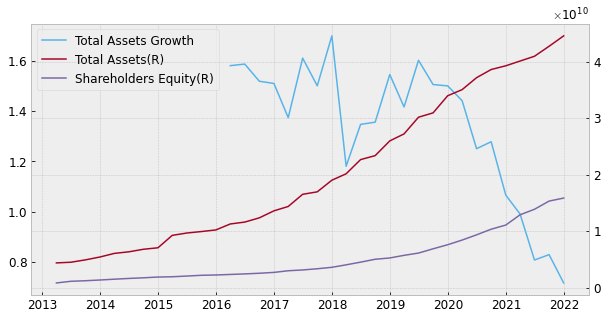

In [ ]:
# 자산 성장률
df['Total Assets Growth'] = (df['Total Assets'] - df['Total Assets'].shift(12)) / abs(df['Total Assets'].shift(12))
fs.draw_chart(df, left='Total Assets Growth', right=['Total Assets', 'Shareholders Equity'])

CAGR: 16.72%
Accumulated return: 195.38%
Investment period: 7.0yrs
Sharpe ratio: 0.82
MDD: -30.30%


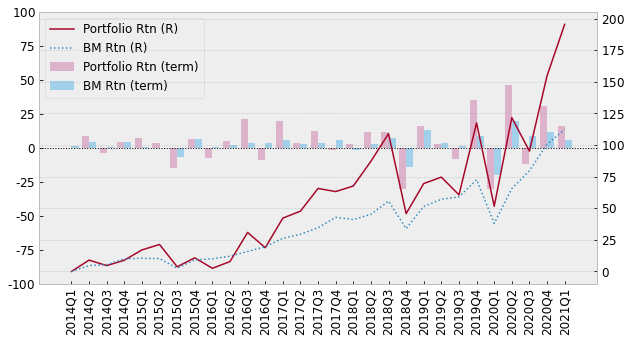

In [ ]:
# 매출액 증가율 백테스팅
s, signal = {}, {}
for t in terms:
  if list(terms).index(t) >= 12:
    prev_t = fs.quarters_before(terms, t, 12) # 12분기
    data[t]['Revenue Growth'] = (data[t]['Revenue'] - data[prev_t]['Revenue']) / abs(data[prev_t]['Revenue'])
    s[t] = fs.fn_filter(data[t], by='Revenue Growth', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 7.58%
Accumulated return: 66.85%
Investment period: 7.0yrs
Sharpe ratio: 0.35
MDD: -47.25%


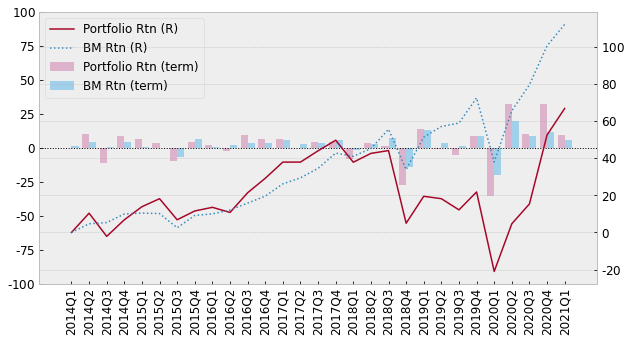

In [ ]:
# 영업이익 증가율 백테스팅
s, signal = {}, {}
for t in terms:
  if list(terms).index(t) >= 12:
    prev_t = fs.quarters_before(terms, t, 12) # 12분기
    data[t]['Operating Income Growth'] = (data[t]['Operating Income'] - data[prev_t]['Operating Income']) / abs(data[prev_t]['Operating Income'])
    s[t] = fs.fn_filter(data[t], by='Operating Income Growth', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 4.12%
Accumulated return: 32.68%
Investment period: 7.0yrs
Sharpe ratio: 0.21
MDD: -32.60%


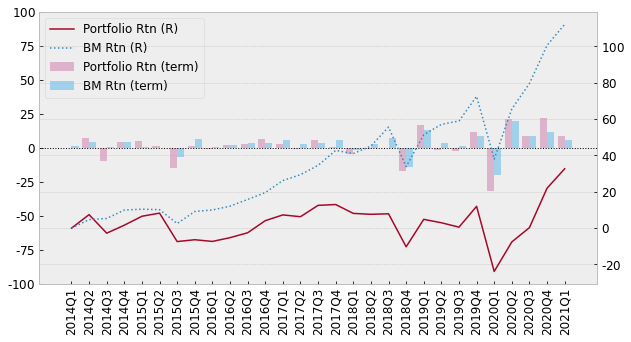

In [ ]:
# 당기순이익 증가율
s, signal = {}, {}
for t in terms:
  if list(terms).index(t) >= 12:
    prev_t = fs.quarters_before(terms, t, 12) # 12분기
    data[t]['Net Income Growth'] = (data[t]['Net Income'] - data[prev_t]['Net Income']) / abs(data[prev_t]['Net Income'])
    s[t] = fs.fn_filter(data[t], by='Net Income Growth', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 6.04%
Accumulated return: 50.79%
Investment period: 7.0yrs
Sharpe ratio: 0.23
MDD: -55.42%


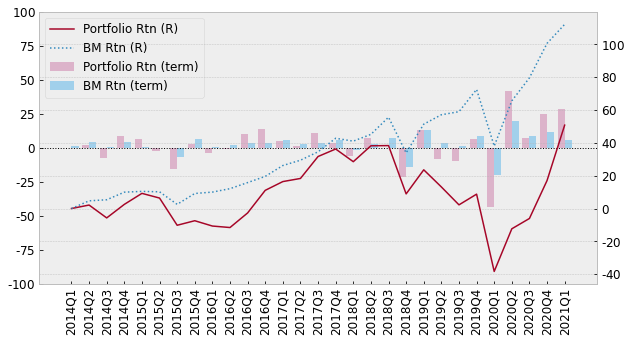

In [ ]:
# 주가 수익비율(PER) + 순이익 증가율(Net Income Growth)
s1, s2, s, signal = {}, {}, {}, {}
for t in terms:
  if list(terms).index(t) >= 12:
    prev_t = fs.quarters_before(terms, t, 12)
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
    data[t]['Net Income Growth'] = (data[t]['Net Income'] - data[prev_t]['Net Income']) / abs(data[prev_t]['Net Income'])

    s1[t] = fs.fn_score(data[t], by='PER', floor=1, cap=10, asc=True)
    s2[t] = fs.fn_score(data[t], by='Net Income Growth', floor=0, asc=False)
    s[t] = fs.combine_score(s1[t], s2[t], n=30)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 8.36%
Accumulated return: 75.49%
Investment period: 7.0yrs
Sharpe ratio: 0.28
MDD: -56.19%


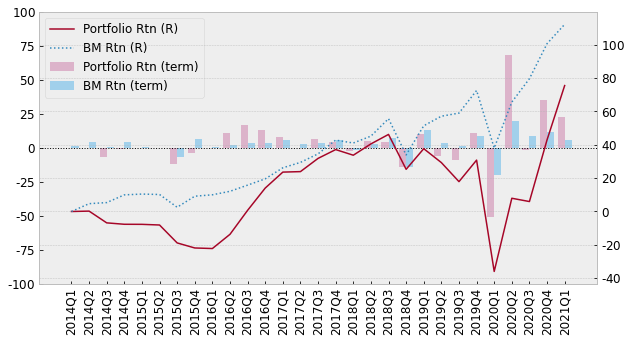

In [ ]:
# 주가순자산 비율(PBR) + 영업이익 증가율(Operating Income Growth)
s1, s2, s, signal = {}, {}, {}, {}
for t in terms:
  if list(terms).index(t) >= 12:
    prev_t = fs.quarters_before(terms, t, 12)
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares']) # PBR
    data[t]['Operating Income Growth'] = (data[t]['Operating Income'] - data[prev_t]['Operating Income']) / abs(data[prev_t]['Operating Income']) # 

    s1[t] = fs.fn_score(data[t], by='PBR', floor=.1, cap=1, asc=True)
    s2[t] = fs.fn_score(data[t], by='Operating Income Growth', floor=0, asc=False)
    s[t] = fs.combine_score(s1[t], s2[t], n=30)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

### 6. 부지런한 기업, 회전율 지표
- 회전율 지표
> - 총자산 회전율 : 자산대비 매출측정
>> - 총자산 회전율이 낮으면 기업이 비효율적으로 운영되는 것이다.
>> $$총자산 회전율 = \frac{매출액(Revenue)}{총자본(Total\,Assets,\,averaged)}$$
> - 매출채권 회전율 : 매출채권대비 매출 측정
>> - 외상으로 물건을 파는 일이 줄었다는 뜻이며, 제품의 경쟁력이 높아지거나 거래처의 질이 높아진 것이다.
>> $$매출채권 회전율 = \frac{매출액(Revenue)}{매출\,채권(Receivables,\,averaged)}$$
> - 재고자산 회전율 : 재고대비 매출원가 측정
>> - 재고자산 회전율이 높으면 물건을 만들면 바로 팔린다는 뜻  
>> - 하지만 너무 높을 경우, 공급이 수요를 못 따라가는 것으로 볼 수 있다.
>> $$재고자산 회전율 = \frac{매출원가(Cost\,of\,Revenue)}{재고\,자산(Inventory,\,averaged)}$$

In [ ]:
df = fs.fn_single(otp='16487125231099712210', symbol='F', window='T') # 포드의 재무제표 데이터

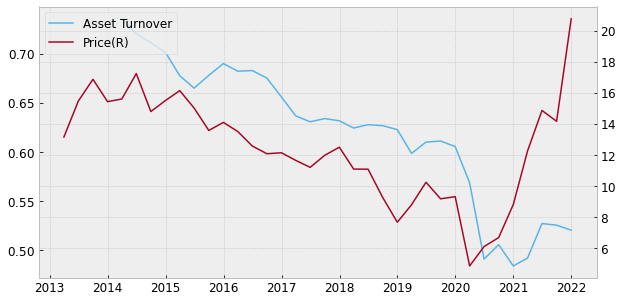

In [ ]:
# 총자산 회전율 : 자산대비 매출 측정
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2
df['Asset Turnover'] = df['Revenue'] / df['Avg Assets']
fs.draw_chart(df, left='Asset Turnover', right='Price')

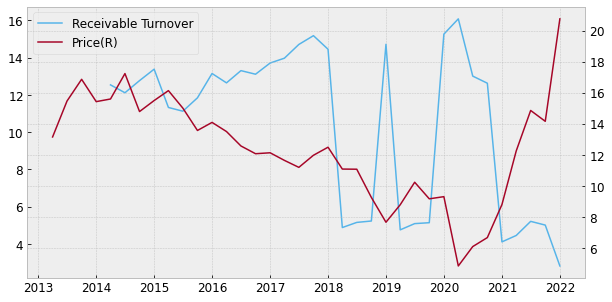

In [ ]:
# 매출채권 회전율
df['Avg Receivables'] = (df['Receivables'] + df['Receivables'].shift(4)) / 2
df['Receivable Turnover'] = df['Revenue'] / df['Avg Receivables']
fs.draw_chart(df, left='Receivable Turnover', right='Price')

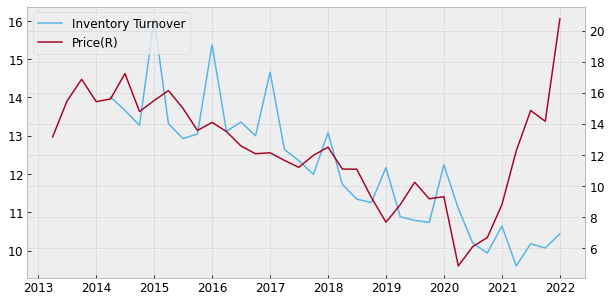

In [ ]:
# 재고자산 회전율
df['Avg Inventory'] = (df['Inventory'] + df['Inventory'].shift(4)) / 2
df['Inventory Turnover'] = df['COGS'] / df['Avg Inventory']
fs.draw_chart(df, left='Inventory Turnover', right='Price')

- 재무상태표
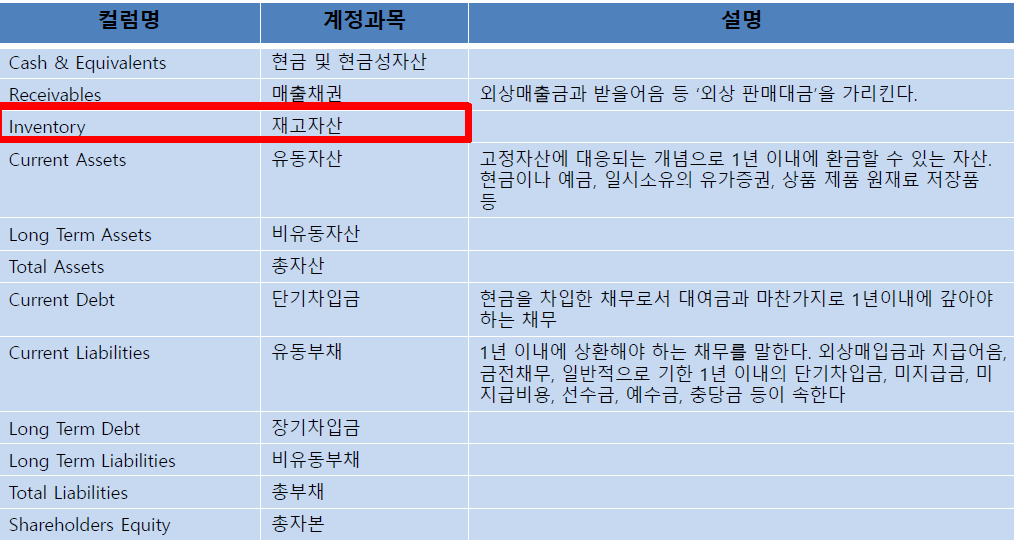

- 손익계산서
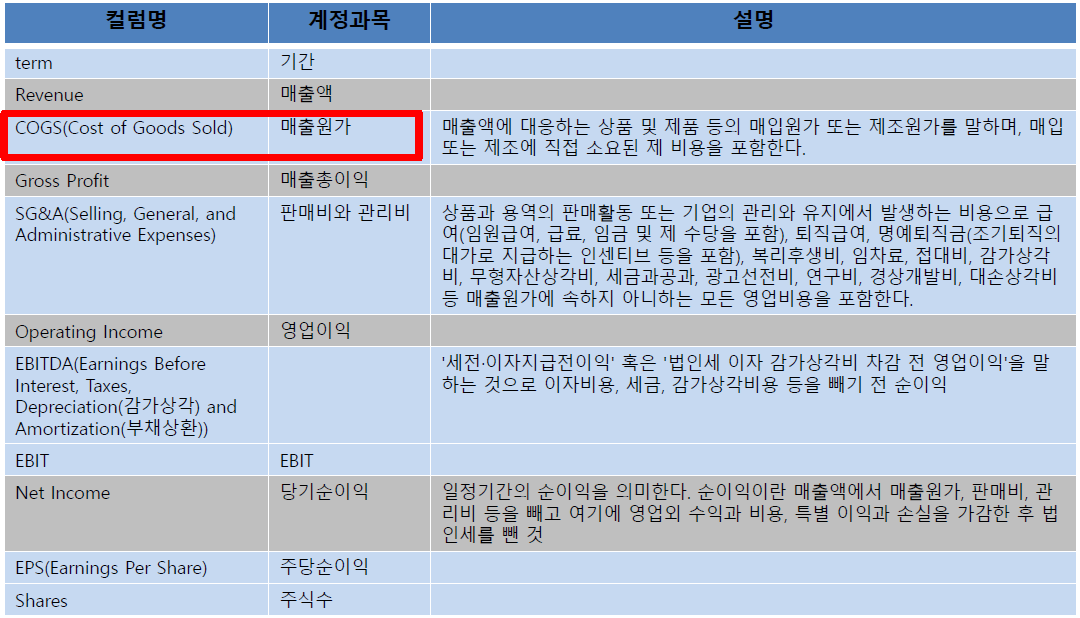

CAGR: 12.68%
Accumulated return: 230.18%
Investment period: 10.0yrs
Sharpe ratio: 0.92
MDD: -25.88%


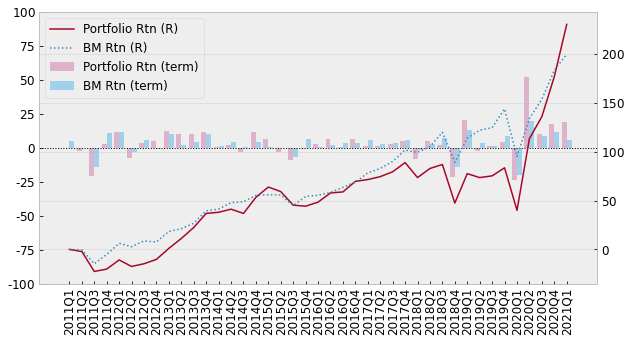

In [ ]:
# 총자산 회전율 백테스팅
s, signal = {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['Assets Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']
  s[t] = fs.fn_filter(data[t], by='Assets Turnover', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 12.84%
Accumulated return: 234.94%
Investment period: 10.0yrs
Sharpe ratio: 1.01
MDD: -31.68%


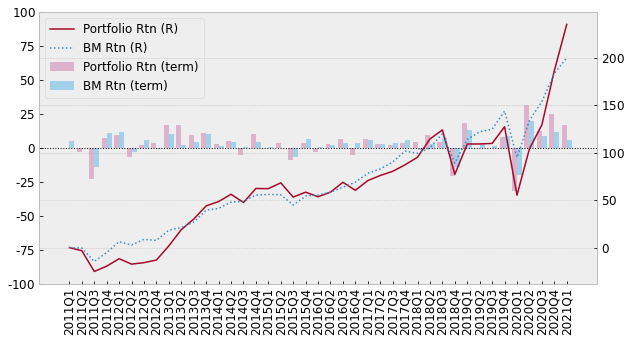

In [ ]:
# GP/E 백테스팅
s, signal = {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) /2
  data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity']
  data[t].loc[(data[t]['Gross Profit'] <0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] <0), 'GP/E'] = float('nan')
  s[t] = fs.fn_filter(data[t], by='GP/E', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 7.47%
Accumulated return: 105.69%
Investment period: 10.0yrs
Sharpe ratio: 0.48
MDD: -37.71%


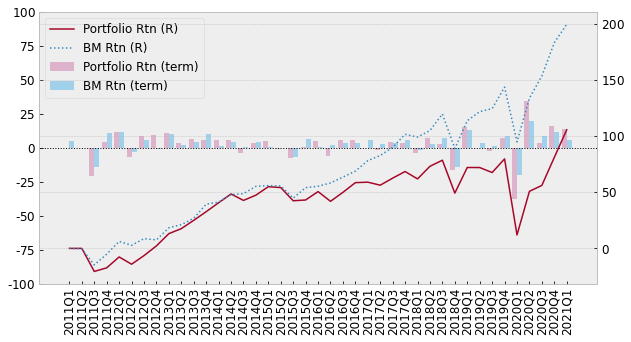

In [ ]:
# S/E, Equity Turnover
s, signal = {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] - data[prev_t]['Shareholders Equity']) /2
  data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity']
  s[t] = fs.fn_filter(data[t], by='Equity Turnover', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 15.55%
Accumulated return: 324.96%
Investment period: 10.0yrs
Sharpe ratio: 1.31
MDD: -23.56%


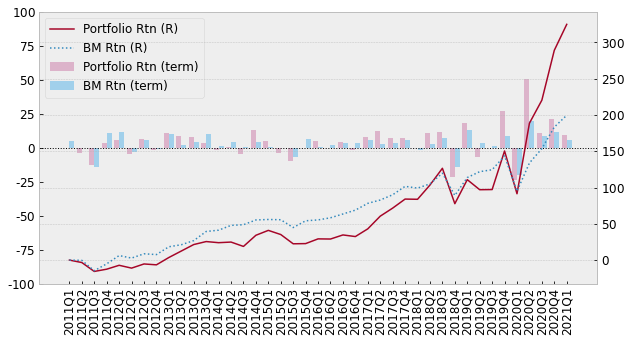

In [ ]:
# 매출채권 회전율(Receivable Turnover)
s, signal = {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Receivables'] = (data[t]['Receivables'] + data[prev_t]['Receivables']) / 2
  data[t]['Receivables Turnover'] = data[t]['Revenue'] / data[t]['Avg Receivables']
  s[t] = fs.fn_filter(data[t], by='Receivables Turnover', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 16.15%
Accumulated return: 347.34%
Investment period: 10.0yrs
Sharpe ratio: 1.44
MDD: -31.75%


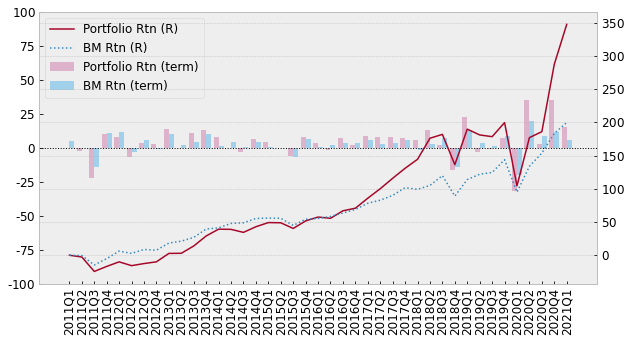

In [ ]:
# 재고자산 회전율(Inventory Turnover)
s, signal = {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Inventory'] = (data[t]['Inventory'] + data[prev_t]['Inventory']) / 2
  data[t]['Inventory Turnover'] = data[t]['COGS'] / data[t]['Avg Inventory']

  s[t] = fs.fn_filter(data[t], by='Inventory Turnover', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

### 7. 해자가 있는 기업, 이익률 지표
- 기업에도 기업을 지키는 강력한 경쟁 요소를 경제적 해자라고 한다.
- 경제적 해자를 이익률로 대체해서 측정하기도 한다.

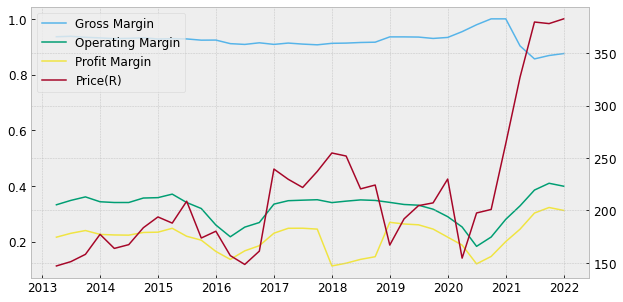

In [ ]:
# 골드만삭스(GS)의 이익률 비교
df = fs.fn_single(otp='16487125231099712210', symbol='GS', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출 총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue'] # 영업 이익률
df['Profit Margin'] = df['Net Income'] / df['Revenue'] # 순이익률
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

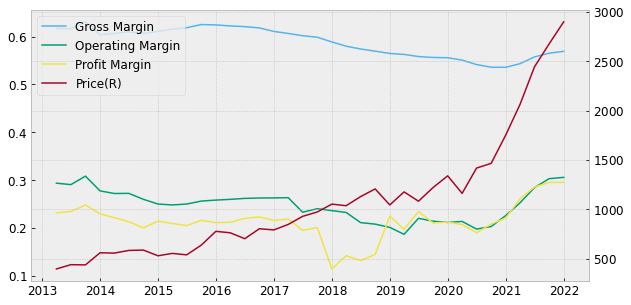

In [ ]:
# 구글(GOOGL)의 이익률 비교
df = fs.fn_single(otp='16487125231099712210', symbol='GOOGL', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출 총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue'] # 영업 이익률
df['Profit Margin'] = df['Net Income'] / df['Revenue'] # 순이익률
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

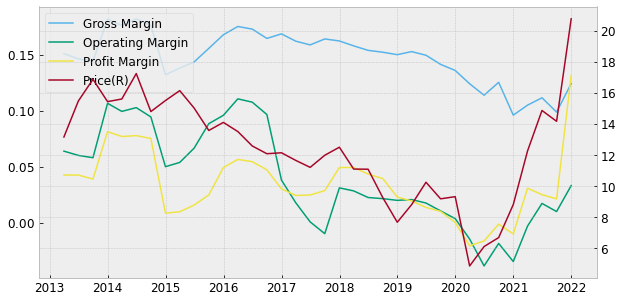

In [ ]:
# 포드(F)의 이익률 비교
df = fs.fn_single(otp='16487125231099712210', symbol='F', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출 총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue'] # 영업 이익률
df['Profit Margin'] = df['Net Income'] / df['Revenue'] # 순이익률
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

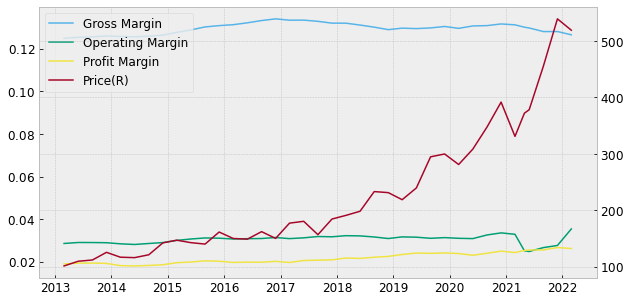

In [ ]:
# 코스트코(COST)의 이익률 비교
df = fs.fn_single(otp='16487125231099712210', symbol='COST', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출 총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue'] # 영업 이익률
df['Profit Margin'] = df['Net Income'] / df['Revenue'] # 순이익률
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

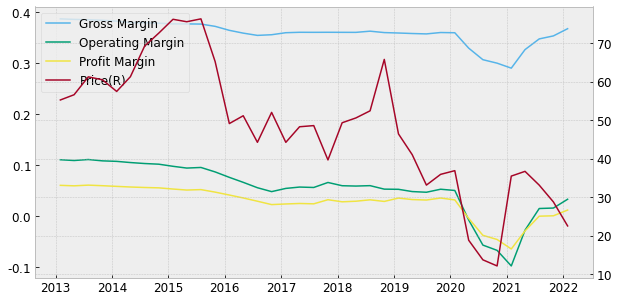

In [ ]:
# 노드스트롬(JWN)의 이익률 비교
df = fs.fn_single(otp='16487125231099712210', symbol='JWN', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue'] # 매출 총이익률
df['Operating Margin'] = df['Operating Income'] / df['Revenue'] # 영업 이익률
df['Profit Margin'] = df['Net Income'] / df['Revenue'] # 순이익률
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

- 이익률은 산업별, 기업 별로 천차만별로 측정된다.
- 보다 정확한 이익률 지표 분석을 위해서는 산업군 별로 비교하는 것이 더 좋을 수 있다.
> $$매출\,총\,이익률(Gross\,Margin) = \frac{매출\,총\,이익(Gross\,Profit)}{매출액(Revenue)}$$

CAGR: 11.86%
Accumulated return: 206.93%
Investment period: 10.0yrs
Sharpe ratio: 0.78
MDD: -29.40%


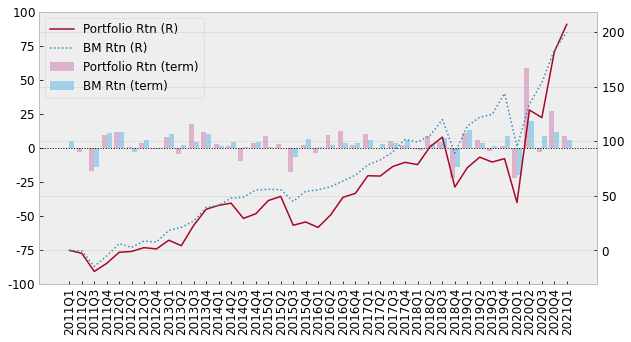

In [ ]:
# Gross Margin
s, signal = {}, {}
for t in terms:
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']
  s[t] = fs.fn_filter(data[t], by='Gross Margin', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# 특정산업군 적용 Gross Margin 비교
# Example로 2020년 3분기 산업군 리스트 확인
sector_info = fs.sector_info(data['2020Q3'])
sector_info

sector
Basic Materials           [Aluminum, Gold, Silver, Specialty Chemicals, ...
Communication Services    [Entertainment, Broadcasting, Telecom Services...
Consumer Cyclical         [Specialty Retail, Auto & Truck Dealerships, G...
Consumer Defensive        [Beverages Brewers, Farm Products, Education &...
Energy                    [Oil & Gas Midstream, Oil & Gas E&P, Oil & Gas...
Financial Services        [Banks Regional, Insurance Diversified, Credit...
Healthcare                [Diagnostics & Research, Drug Manufacturers Ge...
Industrials               [Airlines, Building Products & Equipment, Airp...
Other                                                               [Other]
Real Estate               [Reit Mortgage, Reit Diversified, Reit Residen...
Technology                [Semiconductors, Consumer Electronics, Softwar...
Utilities                 [Utilities Regulated Electric, Utilities Diver...
Name: industry, dtype: object

CAGR: 11.86%
Accumulated return: 206.93%
Investment period: 10.0yrs
Sharpe ratio: 0.78
MDD: -29.40%


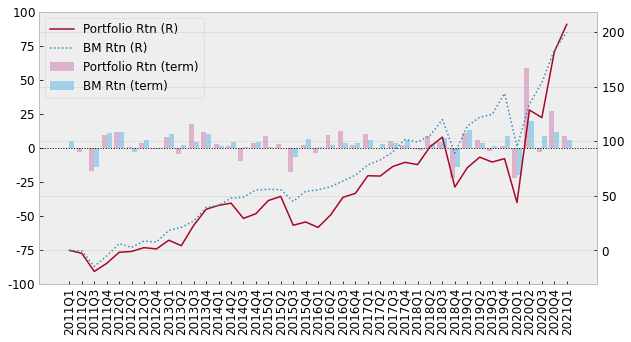

In [ ]:
# 선택한 산업군에 대한 Gross Margin 백테스팅
s, signal = {}, {}
for t in terms:
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] * 100
  s[t] = fs.sector_filter(df=data[t], sector=['Technoloty']) # 분기별 'Technology' 산업군 추출
  s[t] = fs.fn_filter(data[t], by='Gross Margin', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

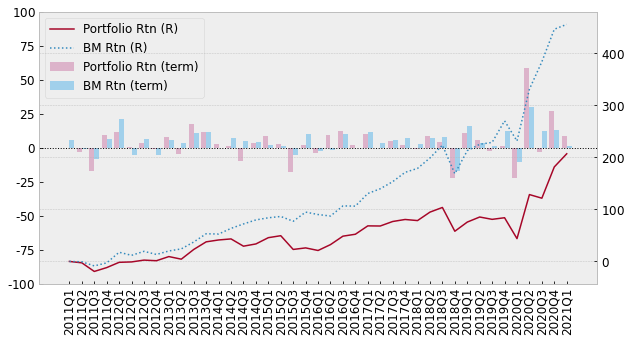

In [ ]:
# 'Technology' 산업군 백테스팅 비교를 위해 관련 ETF인 QQQ 벤치마크
fs.draw_return(df, bm='QQQ')

CAGR: -0.93%
Accumulated return: -8.97%
Investment period: 10.0yrs
Sharpe ratio: -0.05
MDD: -52.13%


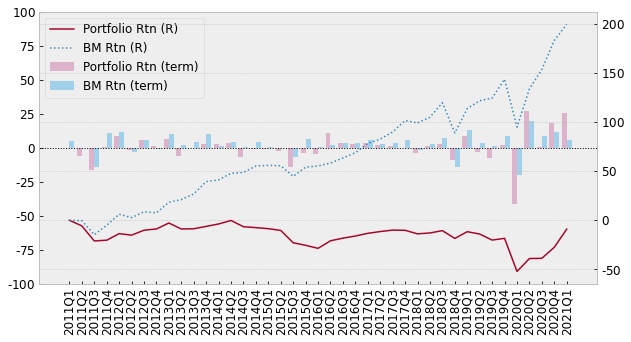

In [ ]:
# 영업이익률(Operating Margin) 백테스팅
s, signal = {}, {}
for t in terms:
  data[t]['Operating Margin'] = data[t]['Operating Income'] / data[t]['Revenue'] * 100
  s[t] = fs.sector_filter(df=data[t], sector=['Technoloty']) # 분기별 'Technology' 산업군 추출
  s[t] = fs.fn_filter(data[t], by='Operating Margin', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

#### 지분가치가 훼손되는 주식
- 주식분할 : 기본에 발행한 주식의 수를 일정 배율만큼 늘리는 것
> - 투자자에게 직접적인 영향이 없다
>- 주식의 수가 배수적으로 늘어남 -> 주식수 증가폭이 크다.

- 유상증자 : 기존에 발행한 주식의 수에서 추가로 주식을 발행하는 것
> 투자자에게 직접적인 영향을 끼친다.
>- 주식수가 점진적으로 늘어남 -> 주식수 증가폭이 작다
---
- 주식 수가 줄어드는 좋은 예
> - 기업이 주주가치 극대화를 위해 이익잉여금으로 주식을 사들여 자사주 소각을 하는 경우
- 유상증자가 항상 좋은 예
> - 새로운 사업을 시작하기 위해 자본을 모집하는 경우

In [ ]:
# 2020년 유상증자를 실행한 테슬라의 재무제표 데이터 불러오기
df = fs.fn_single(otp='16487125231099712210', symbol='TSLA', window='T')
df.columns

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

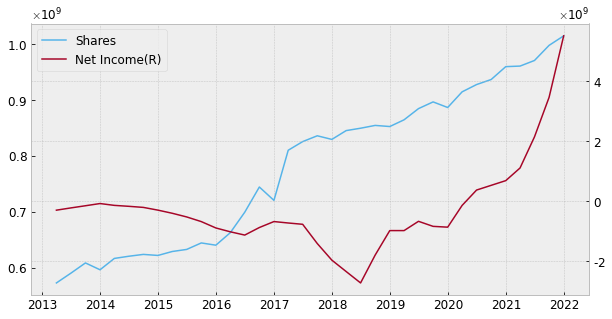

In [ ]:
fs.draw_chart(df, left='Shares', right='Net Income')

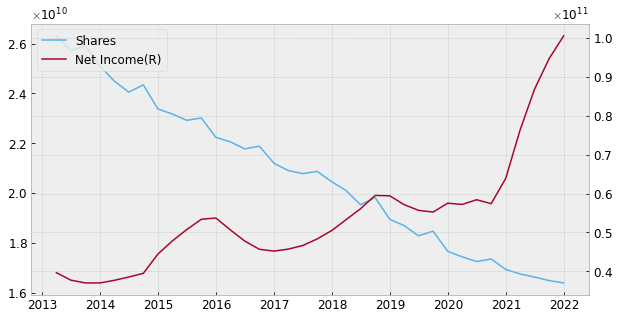

In [ ]:
# 애플 주식 수 변동 확인
df = fs.fn_single(otp='16487125231099712210', symbol='AAPL', window='T')
fs.draw_chart(df, left='Shares', right='Net Income')

In [ ]:
# backting term and data setting
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487125231099712210', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


### 1. 그린블라트의 마법공식
NCAV(그레이엄의 청산가치)를 보완한 공식

- 그린블라트의 마법공식 : 좋은 회사의 주식을 싼 가격에 사기
> - 좋은 회사 : 높은 자본수익률(ROC = EBIT/Return of Capital)보유  
> - 싼 가격 : 높은 이익수익률(PER의 역수) 보유

In [ ]:
# 코카콜라의 재무제표 데이터
df = fs.fn_single(otp='16487125231099712210', symbol = 'KO', window='T')

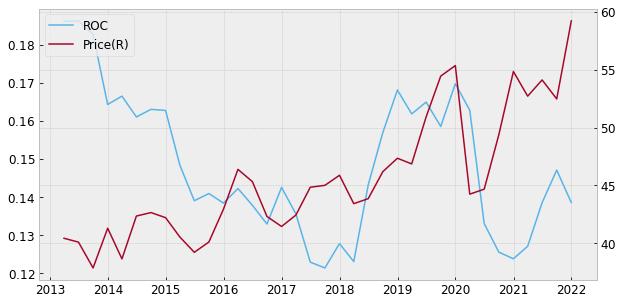

In [ ]:
df['ROC'] = df['EBIT'] / (df['Total Assets'] - df['Current Liabilities'])
fs.draw_chart(df, left='ROC', right='Price')

CAGR: 4.16%
Accumulated return: 50.36%
Investment period: 10.0yrs
Sharpe ratio: 0.17
MDD: -54.68%


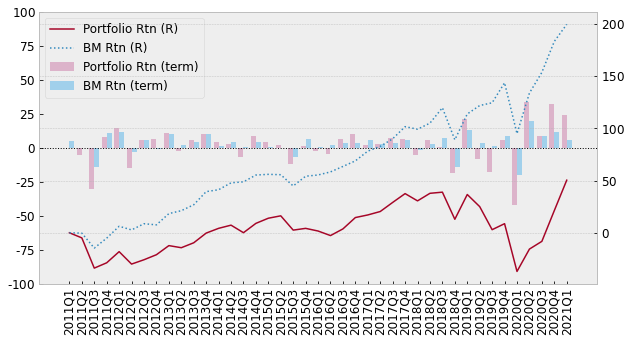

In [ ]:
# Magic Formular backtesting
# PER, ROC 결합
s1, s2, s, signal = {}, {}, {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # PER의 역수 = 이익 수익률(Earnings Yield)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2 # 현재 평균 자산
  data[t]['Avg Current Liabilities'] = (data[t]['Current Liabilities'] + data[prev_t]['Current Liabilities']) / 2 # 현재 평균 부채
  data[t]['ROC'] = data[t]['EBIT'] / ( data[t]['Avg Assets'] - data[t]['Avg Current Liabilities']) # EBIT / 투입자본(=자산-부채)
  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, cap=10, asc=True) # PER 하위권 = 높은 이익 수익률
  s2[t] = fs.fn_score(data[t], by='ROC', method='relative', floor=0, asc=False) # ROC 상위권 = 높은 자본수익률
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001, rf_rate=.01)
fs.draw_return(df)

CAGR: 22.38%
Accumulated return: 654.60%
Investment period: 10.0yrs
Sharpe ratio: 1.64
MDD: -44.44%


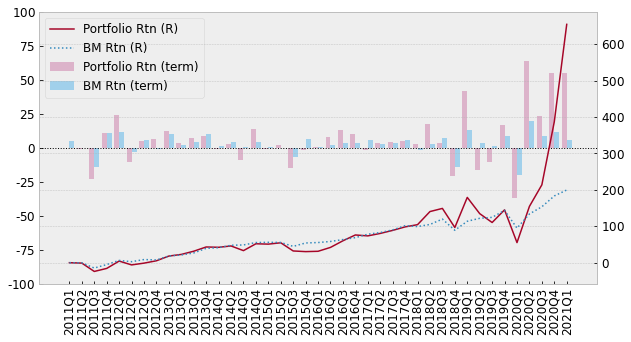

In [ ]:
# 강환국 developed 마법공식
# PBR, GP/A 결합
s1, s2, s, signal = {}, {}, {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  #PBR
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  #GP/A
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets'] # GP/A = 매출 총이익 / 총 자산

  s1[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, cap=2, asc=True) # PBR 하위권
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False) # GP/A 상위권
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001, rf_rate=.01)
fs.draw_return(df)

### 2. 피오트로스키의 F Score

F score는 총 9가지 지표를 결합하여 만든 지표이다.
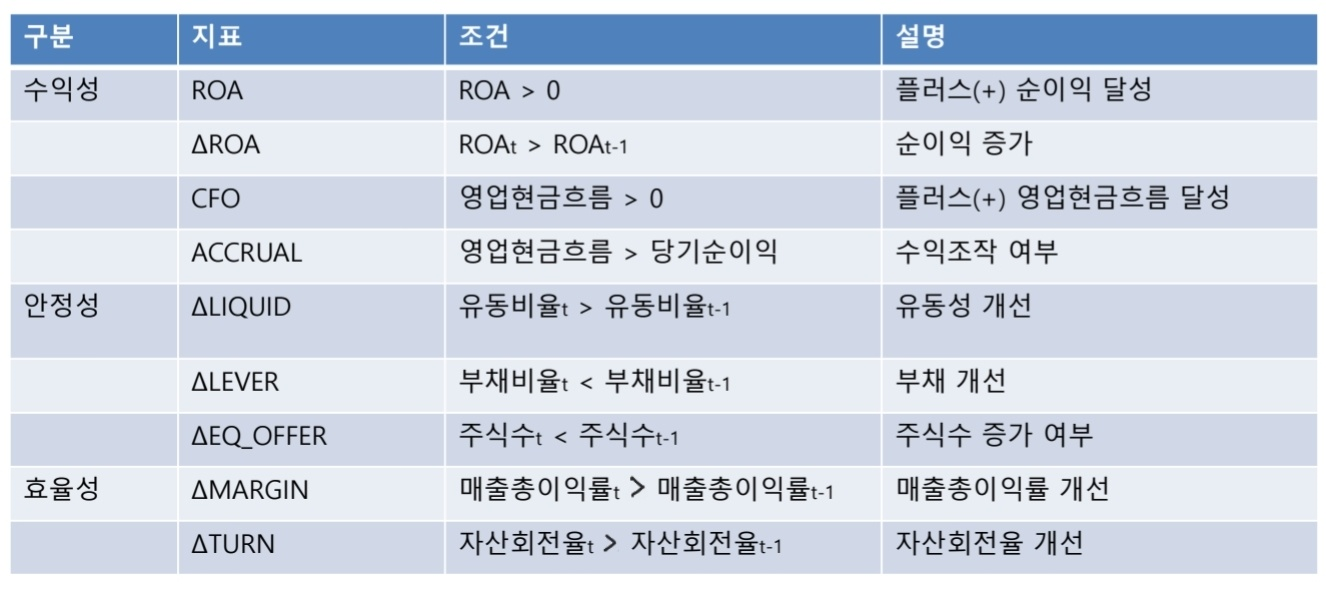

In [ ]:
# 페이스북 F score
df = fs.fn_single(otp='16487125231099712210', symbol='FB', window='T')

In [ ]:
# factor 계산
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2
df['ROA'] = df['Net Income'] / df['Avg Assets']
df['Current Ratio'] = df['Current Assets'] / df['Current Liabilities']
df['Debt/Asset'] = df['Long Term Debt'] / df['Total Assets']
df['Gross Margin'] = df['Gross Profit'] / df['Revenue']
df['Asset Turnover'] = df['Revenue'] / df['Avg Assets']

In [ ]:
# F score 초기화
df['F_ROA'] = 0 # 순이익 흑자 달성
df['F_ROA_dt'] = 0 # 순이익 증가
df['F_CFO']= 0 # 영업현금흐름 흑자 달성
df['F_Accrual'] = 0 # 수익조작 여부
df['F_Liquid'] = 0 # 유동성 개선
df['F_Lever']= 0 # 부채 개선
df['F_Shares'] = 0 # 주식수 증가 여부
df['F_Margin'] = 0 # 매출총이익률 개선
df['F_Turn'] = 0 # 자산회전율 개선

df['F_Score'] = 0 # 총점

In [ ]:
df.loc[df['ROA'] > 0, 'F_ROA'] = 1
df.loc[df['ROA'] > df['ROA'].shift(4), 'F_ROA_dt'] = 1
df.loc[df['Operating Cash Flow'] > 0, 'F_CFO'] = 1
df.loc[df['Operating Cash Flow'] - df['Net Income'] > 0, 'F_Accrual'] = 1
df.loc[df['Current Ratio'] - df['Current Ratio'].shift(4) > 0, 'F_Liquid'] = 1
df.loc[df['Debt/Asset'] - df['Debt/Asset'].shift(4) < 0,  'F_Lever'] = 1
df.loc[df['Shares'] - df['Shares'].shift(4) < 0, 'F_Shares'] = 1
df.loc[df['Gross Margin'] - df['Gross Margin'].shift(4) > 0, 'F_Margin'] = 1
df.loc[df['Asset Turnover'] - df['Asset Turnover'].shift(4) > 0, 'F_Turn'] = 1

df['F_Score'] = df['F_ROA'] + df['F_ROA_dt'] + df['F_CFO'] + df['F_Accrual'] + df['F_Liquid'] + df['F_Lever'] + df['F_Shares'] + df['F_Margin'] + df['F_Turn']

In [ ]:
df[['F_Score', 'F_ROA', 'F_ROA_dt', 'F_CFO', 'F_Accrual', 'F_Liquid', 'F_Lever', 'F_Shares', 'F_Margin', 'F_Turn']].tail()

,F_Score,F_ROA,F_ROA_dt,F_CFO,F_Accrual,F_Liquid,F_Lever,F_Shares,F_Margin,F_Turn
2020-12-31,7,1,1,1,1,1,1,1,0,0
2021-03-31,8,1,1,1,1,1,1,1,0,1
2021-06-30,7,1,1,1,1,0,1,1,0,1
2021-09-30,6,1,1,1,1,0,0,1,0,1
2021-12-31,7,1,1,1,1,0,0,1,1,1


In [ ]:
# 피오트로스키의 F Score Backtesting
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487125231099712210', term=t, vol=0)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


- F score 백 테스팅
> - 추가 팩터 생성
> - F score 지표 초기화
> - F score 지표 계산
> - F score 총점 계산

In [ ]:
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  # factor 계산
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
  data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities']
  data[t]['Debt/Asset'] = data[t]['Long Term Debt'] / data[t]['Total Assets']
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']
  data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']

  # F score 초기화
  data[t]['F_ROA'] = 0 # 순이익 흑자 달성
  data[t]['F_ROA_dt'] = 0 # 순이익 증가
  data[t]['F_CFO']= 0 # 영업현금흐름 흑자 달성
  data[t]['F_Accrual'] = 0 # 수익조작 여부
  data[t]['F_Liquid'] = 0 # 유동성 개선
  data[t]['F_Lever']= 0 # 부채 개선
  data[t]['F_Shares'] = 0 # 주식수 증가 여부
  data[t]['F_Margin'] = 0 # 매출총이익률 개선
  data[t]['F_Turn'] = 0 # 자산회전율 개선

  data[t]['F_Score'] = 0 # 총점

  # F score 지표 계산
  data[t].loc[data[t]['ROA'] > 0, 'F_ROA'] = 1
  data[t].loc[data[t]['ROA'] > data[t]['ROA'].shift(4), 'F_ROA_dt'] = 1
  data[t].loc[data[t]['Operating Cash Flow'] > 0, 'F_CFO'] = 1
  data[t].loc[data[t]['Operating Cash Flow'] - data[t]['Net Income'] > 0, 'F_Accrual'] = 1
  data[t].loc[data[t]['Current Ratio'] - data[t]['Current Ratio'].shift(4) > 0, 'F_Liquid'] = 1
  data[t].loc[data[t]['Debt/Asset'] - data[t]['Debt/Asset'].shift(4) < 0,  'F_Lever'] = 1
  data[t].loc[data[t]['Shares'] - data[t]['Shares'].shift(4) < 0, 'F_Shares'] = 1
  data[t].loc[data[t]['Gross Margin'] - data[t]['Gross Margin'].shift(4) > 0, 'F_Margin'] = 1
  data[t].loc[data[t]['Asset Turnover'] - data[t]['Asset Turnover'].shift(4) > 0, 'F_Turn'] = 1

  data[t]['F_Score'] = data[t]['F_ROA'] + data[t]['F_ROA_dt'] + data[t]['F_CFO'] + data[t]['F_Accrual'] + data[t]['F_Liquid'] + data[t]['F_Lever'] + data[t]['F_Shares'] + data[t]['F_Margin'] + data[t]['F_Turn']

CAGR: 11.47%
Accumulated return: 196.44%
Investment period: 10.0yrs
Sharpe ratio: 0.84
MDD: -44.96%


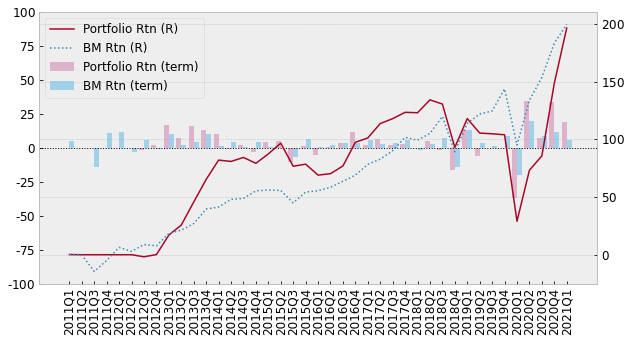

In [ ]:
# High F-Score
s1, s2, s3, s, signal = {}, {}, {}, {}, {}
for t in terms:
  s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True) # 시총0~1000 인 소형주 기업
  s2[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
  s3[t] = fs.fn_filter(data[t], by='F_Score', floor=7, cap=9, asc=False)
  s[t] = fs.combine_signal(s1[t], s2[t], s3[t]).sample(frac=1)[:30] # 선택된 종목으로 합성후 랜덤으로 30개 주 추첨
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [ ]:
# Dataframe sample 함수의 용법
import pandas as pd

data = {
    'Name' : ['Microsoft Corporation', 'Google, LLC', 'Tesla, lnc', \
              'Apple lnc', 'Netflix, lnc'],
    'Symbol' : ['MSFT', 'GOOG', 'TSLA', 'AAPL', 'NFLX'],
    'Shares' : [100, 50, 150, 200, 80]
}

df = pd.DataFrame(data)
df

,Name,Symbol,Shares
0,Microsoft Corporation,MSFT,100
1,"Google, LLC",GOOG,50
2,"Tesla, lnc",TSLA,150
3,Apple lnc,AAPL,200
4,"Netflix, lnc",NFLX,80


In [ ]:
df_sub = df.sample(frac=.67) # 전체중 67% 랜덤하게 추첨
print(df_sub)

           Name Symbol  Shares
2    Tesla, lnc   TSLA     150
3     Apple lnc   AAPL     200
4  Netflix, lnc   NFLX      80


Joseph Piotroski F score
- 그때 그때 선택되는 30개 종목이 다름
- 1,000회 반복하여 평균을 낸다고 함

CAGR: 26.23%
Accumulated return: 928.99%
Investment period: 10.0yrs
Sharpe ratio: 3.35
MDD: -23.60%


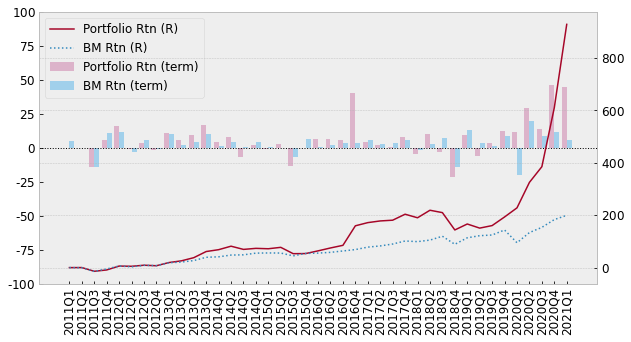

In [ ]:
# Mid F-Score
s1, s2, s3, s, signal = {}, {}, {}, {}, {}
for t in terms:
  s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True) # 시총0~1000 인 소형주 기업
  s2[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
  s3[t] = fs.fn_filter(data[t], by='F_Score', floor=4, cap=6, asc=False)
  s[t] = fs.combine_signal(s1[t], s2[t], s3[t]).sample(frac=1)[:30] # 선택된 종목으로 합성후 랜덤으로 30개 주 추첨
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 27.26%
Accumulated return: 1016.12%
Investment period: 10.0yrs
Sharpe ratio: 2.70
MDD: -32.22%


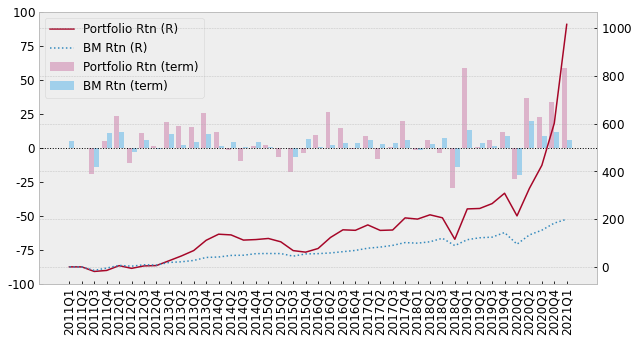

In [ ]:
# Low F-Score
s1, s2, s3, s, signal = {}, {}, {}, {}, {}
for t in terms:
  s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True) # 시총0~1000 인 소형주 기업
  s2[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
  s3[t] = fs.fn_filter(data[t], by='F_Score', floor=0, cap=3, asc=False)
  s[t] = fs.combine_signal(s1[t], s2[t], s3[t]).sample(frac=1)[:30] # 선택된 종목으로 합성후 랜덤으로 30개 주 추첨
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

### 3. 전략 실행을 위한 필수 조건, 유동성
- 유동성이 부족하여 사고팔기 어려운 종목은 매매하지 않도록 하자

In [ ]:
# 유동성 고려 X
data = fs.fn_consolidated(otp='16487125231099712210', term='2020Q4', vol=0)
data['avg_volume']

2020Q4...OK


symbol
A        1583030
AA       4514200
AAIC      195900
AAL     54210000
AAMC        6700
          ...   
ZUMZ      332933
ZUO      1440630
ZVO       527933
ZYME      321367
ZYXI      750633
Name: avg_volume, Length: 4125, dtype: int64

In [ ]:
# 유동성 고려(100만주 이상)
data = fs.fn_consolidated(otp='16487125231099712210', term='2020Q4', vol=1000000)
data['avg_volume']

2020Q4...OK


symbol
A         1583030
AA        4514200
AAL      54210000
AAPL    186217000
ABB       1482000
          ...    
ZS        3182870
ZSAN      4593800
ZTO       3821430
ZTS       1792600
ZUO       1440630
Name: avg_volume, Length: 1252, dtype: int64

In [ ]:
# 유동성 백테스팅
# 10만 volume(중유동주)
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487125231099712210', term=t, vol=100000)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
for t in terms:
  # Set previous terms
  prev_t = fs.quarters_before(terms, t, 4)
  # Company Size
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']

  #Value
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # 주가수익비율
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares']) # 주가순자산비율
  data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares']) # 주가매출비율
  data[t]['PCR'] = data[t]['Price_M3'] / ((data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares']) # 주가현금흐름비율

  # Profitability
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2 # 평균 자산
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2 # 평균 자본
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets'] # 자산대비이익
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'ROA'] = float('nan')
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity'] # 자본대비이익
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'ROE'] = float('nan')
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets'] # 자산대비 영업효율
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')
  data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity'] # 자본대비 영업효율

  # Stability
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity'] # 부채비율
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity'] # 차입금비율
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Debt/Equity'] = float('nan')
  data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities'] # 현재 부채 대비 자산
  data[t]['Shares Increase'] = data[t]['Shares'] / data[prev_t]['Shares'] # 주식수 증가율

  # Efficiency
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] # 매출 총이익률
  data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets'] # 총자산 회전율
  data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity'] # 총자본 회전율

  # Momentum
  data[t]['Price Growth'] = data[t]['Price_M3'] / data[prev_t]['Price_M3'] # 주가 성장률

In [ ]:
# GP/E + 소형주 + 증자X + 중유동주
s1, s2, s3, s, signal = {}, {}, {}, {}, {}
for t in terms:
  s1[t] = fs.fn_score(data[t], by='GP/E', method='relative', floor=0, asc=False)
  s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s3[t] = fs.fn_filter(data[t], by='Shares Increase', floor=.9, cap=1)
  s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 12.85%
Accumulated return: 235.18%
Investment period: 10.0yrs
Sharpe ratio: 0.79
MDD: -56.79%


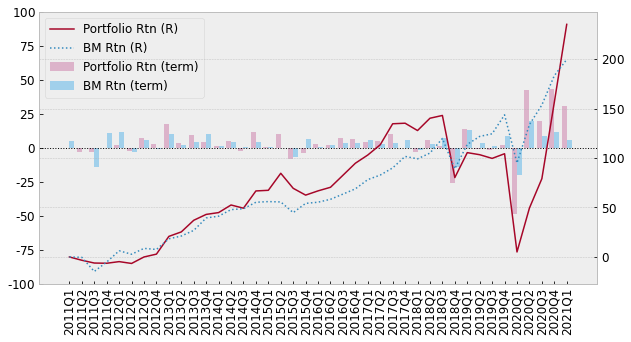

In [ ]:
fs.draw_return(df)

In [ ]:
# 유동성 백테스팅
# 100만 volume(고유동주)
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487125231099712210', term=t, vol=1000000)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
for t in terms:
  # Set previous terms
  prev_t = fs.quarters_before(terms, t, 4)
  # Company Size
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']

  #Value
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # 주가수익비율
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares']) # 주가순자산비율
  data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares']) # 주가매출비율
  data[t]['PCR'] = data[t]['Price_M3'] / ((data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares']) # 주가현금흐름비율

  # Profitability
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2 # 평균 자산
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2 # 평균 자본
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets'] # 자산대비이익
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'ROA'] = float('nan')
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity'] # 자본대비이익
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'ROE'] = float('nan')
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets'] # 자산대비 영업효율
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')
  data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity'] # 자본대비 영업효율

  # Stability
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity'] # 부채비율
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity'] # 차입금비율
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Debt/Equity'] = float('nan')
  data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities'] # 현재 부채 대비 자산
  data[t]['Shares Increase'] = data[t]['Shares'] / data[prev_t]['Shares'] # 주식수 증가율

  # Efficiency
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] # 매출 총이익률
  data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets'] # 총자산 회전율
  data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity'] # 총자본 회전율

  # Momentum
  data[t]['Price Growth'] = data[t]['Price_M3'] / data[prev_t]['Price_M3'] # 주가 성장률

CAGR: 13.15%
Accumulated return: 244.41%
Investment period: 10.0yrs
Sharpe ratio: 1.39
MDD: -27.78%


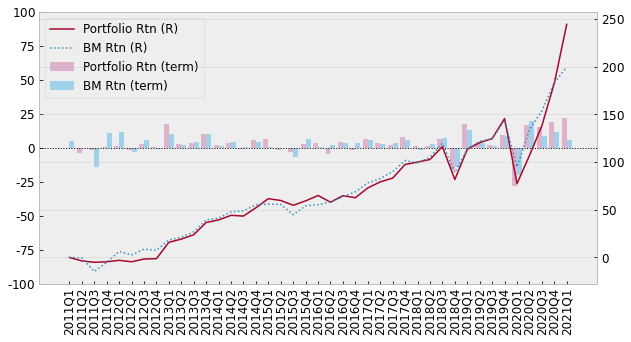

In [ ]:
# GP/E + 소형주 + 증자X + 중유동주
s1, s2, s3, s, signal = {}, {}, {}, {}, {}
for t in terms:
  s1[t] = fs.fn_score(data[t], by='GP/E', method='relative', floor=0, asc=False)
  s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s3[t] = fs.fn_filter(data[t], by='Shares Increase', floor=.9, cap=1)
  s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

### 4. 세상에 없는 나만의 투자 전략 만들기
1. 가치투자 4대장 콤보 + 소형주
2. (4대장 + GP/A + 부채비율+유동비율) + 소형주 + 증자X
3. (4대장 GP/E + 부채비율 + 유동비율) + 소형주 + 증자X +모멘텀
4. GP/A + 소형주 + 증자X
5. 자산회전율 + GP/A + 소형주

In [ ]:
# 재무데이터 세팅
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16491726171099712210', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
# factor 계산
for t in terms:
  # Set previous terms
  prev_t = fs.quarters_before(terms, t, 4)
  # Company Size
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']

  #Value
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # 주가수익비율
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares']) # 주가순자산비율
  data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares']) # 주가매출비율
  data[t]['PCR'] = data[t]['Price_M3'] / ((data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares']) # 주가현금흐름비율

  # Profitability
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2 # 평균 자산
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2 # 평균 자본
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets'] # 자산대비이익
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'ROA'] = float('nan')
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity'] # 자본대비이익
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'ROE'] = float('nan')
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets'] # 자산대비 영업효율
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')
  data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity'] # 자본대비 영업효율

  # Stability
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity'] # 부채비율
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity'] # 차입금비율
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Debt/Equity'] = float('nan')
  data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities'] # 현재 부채 대비 자산
  data[t]['Shares Increase'] = data[t]['Shares'] / data[prev_t]['Shares'] # 주식수 증가율

  # Efficiency
  data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] # 매출 총이익률
  data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets'] # 총자산 회전율
  data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity'] # 총자본 회전율

  # Momentum
  data[t]['Price Growth'] = data[t]['Price_M3'] / data[prev_t]['Price_M3'] # 주가 성장률

CAGR: 11.43%
Accumulated return: 195.51%
Investment period: 10.0yrs
Sharpe ratio: 0.63
MDD: -48.92%


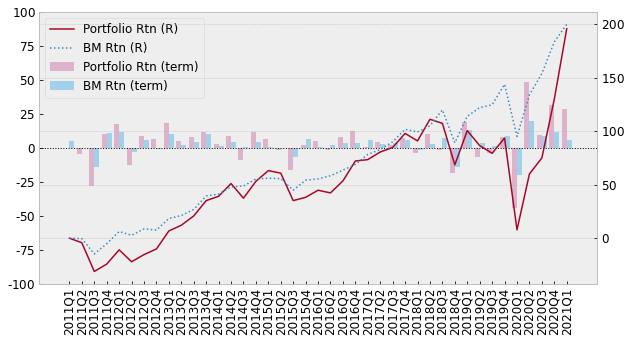

In [ ]:
# 가치투자 4대장 콤보 + 소형주
s1, s2, s3, s4, s5, s6, s, signal = {}, {}, {}, {}, {}, {}, {}, {}
for t in terms:
  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
  s2[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
  s3[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
  s4[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
  s5[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s6[t] = fs.combine_score(s1[t], s2[t], s3[t], s4[t])
  s[t] = fs.combine_signal(s6[t], s5[t], how='and', n=50)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 9.45%
Accumulated return: 146.76%
Investment period: 10.0yrs
Sharpe ratio: 0.53
MDD: -52.28%


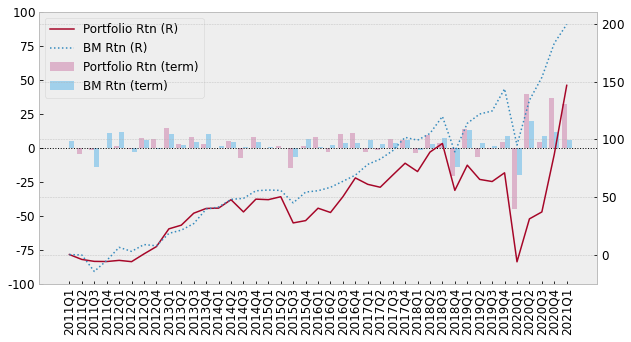

In [ ]:
# (4대장 + GP/A + 부채비율 + 유동비율) + 소형주 + 증자X
s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s, signal = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}
for t in terms:
  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
  s2[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
  s3[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
  s4[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
  s5[t] = fs.fn_score(data[t], by='ROE', method='relative', floor=.1, asc=False)
  s6[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
  s7[t] = fs.fn_score(data[t], by='Debt/Equity', method='relative', floor=0, asc=True)
  s8[t] = fs.fn_score(data[t], by='Current Ratio', method='relative', floor=0, asc=False)

  s9[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s10[t] = fs.fn_filter(data[t], by='Shares Increase', floor=.9, cap=1)

  s11[t] = fs.combine_score(s1[t], s2[t], s3[t], s4[t], s5[t], s6[t], s7[t], s8[t])
  s[t] = fs.combine_signal(s11[t], s9[t], s10[t], how='and', n=50)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 6.19%
Accumulated return: 82.48%
Investment period: 10.0yrs
Sharpe ratio: 0.46
MDD: -39.96%


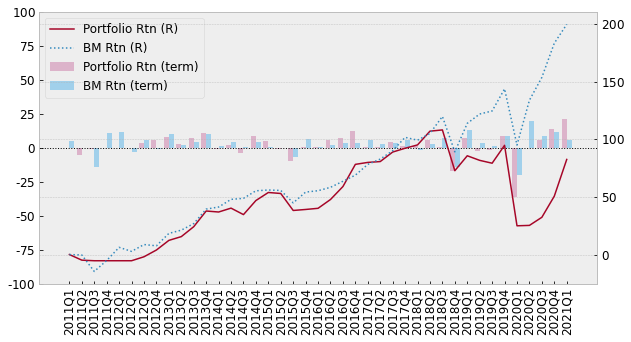

In [ ]:
# (4대장 + GP/A + 부채비율 + 유동비율) + 소형주 + 증자X + 모멘텀
s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s, signal = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}
for t in terms:
  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
  s2[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
  s3[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
  s4[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
  s5[t] = fs.fn_score(data[t], by='ROE', method='relative', floor=.1, asc=False)
  s6[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
  s7[t] = fs.fn_score(data[t], by='Debt/Equity', method='relative', floor=0, asc=True)
  s8[t] = fs.fn_score(data[t], by='Current Ratio', method='relative', floor=0, asc=False)

  s9[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s10[t] = fs.fn_filter(data[t], by='Shares Increase', floor=.9, cap=1)
  s11[t] = fs.fn_filter(data[t], by='Price Growth', floor=1)

  s12[t] = fs.combine_score(s1[t], s2[t], s3[t], s4[t], s5[t], s6[t], s7[t], s8[t])
  s[t] = fs.combine_signal(s11[t], s9[t], s10[t], s11[t], how='and', n=50)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 10.07%
Accumulated return: 161.12%
Investment period: 10.0yrs
Sharpe ratio: 0.62
MDD: -49.04%


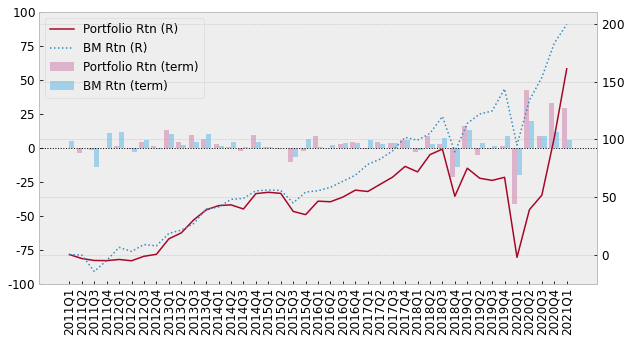

In [ ]:
# GP/A + 소형주 + 증자X
s1, s2, s3, s, signal = {}, {}, {}, {}, {}
for t in terms:
  s1[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)

  s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s3[t] = fs.fn_filter(data[t], by='Shares Increase', floor=0.9, cap=1)
  s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=50)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 16.40%
Accumulated return: 357.00%
Investment period: 10.0yrs
Sharpe ratio: 1.20
MDD: -38.02%


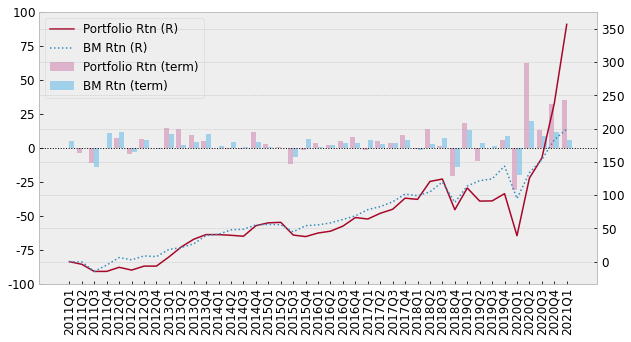

In [ ]:
# 자산회전율 + GP/A + 소형주
s1, s2, s3, s4, s, signal = {}, {}, {}, {}, {}, {}
for t in terms:
  s1[t] = fs.fn_score(data[t], by='Asset Turnover', method='relative', floor=0, asc=False)
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)

  s3[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
  s4[t] = fs.combine_score(s1[t], s2[t])

  s[t] = fs.combine_signal(s4[t], s3[t], how='and', n=50)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)